In [22]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# CSV 파일 읽기
df = pd.read_csv('keyword2.csv')

# 키워드 열 선택
keywords_columns = ['키워드1', '키워드2', '키워드3', '키워드4', '키워드5', '키워드6']
keywords_df = df[keywords_columns]

# 각 키워드를 리스트로 변환
keywords_list = [list(keywords_df.iloc[i].dropna()) for i in range(len(keywords_df))]

# MultiLabelBinarizer를 사용하여 원핫인코딩 수행
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(keywords_list)

# 결과를 DataFrame으로 변환
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# 제품명과 원핫인코딩 결과를 합치기
result_df = pd.concat([df['제품명'], one_hot_df], axis=1)

# 결과를 CSV 파일로 저장
result_df.to_csv('one_hot_encoded.csv', index=False)

In [23]:
df = pd.read_csv("one_hot_encoded.csv")
df.head()

,제품명,가벼움,가성비,각질,간편,건성,겨울,남성,대용량,모공,...,수분감,순함,여름,올인원,자극,지성,진정,트러블,피지,환절기
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,[비건인증] 포인트앤 딥 클린 올인원 클렌징 티슈 80매,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,[비건인증/무색소] 포인트앤 딥 클린 립앤아이 리무버 200ml 더블기획,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,[비건인증/펌핑타입] 더샘 내추럴 컨디션 탄산 클렌징워터 500ml,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
4,[화해1위] 포인트앤 딥멜팅 소이 클렌징 밤 90ml,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [28]:
import pandas as pd

# keyword1.csv 파일 읽기
df1 = pd.read_csv('one_hot_encoded.csv')

# keyword2.csv 파일 읽기
df2 = pd.read_csv('제품정보.csv')

# 두 데이터프레임을 제품명을 기준으로 병합
merged_df = pd.merge(df1, df2[['제품명', '원가', '별점']], on='제품명', how='inner')

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('merged_result.csv', index=False)


In [29]:
df = pd.read_csv("merged_result.csv")
df.head()

,제품명,가벼움,가성비,각질,간편,건성,겨울,남성,대용량,모공,...,여름,올인원,자극,지성,진정,트러블,피지,환절기,원가,별점
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,"18,000",4.7
1,[비건인증] 포인트앤 딥 클린 올인원 클렌징 티슈 80매,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,"11,900",4.6
2,[비건인증/무색소] 포인트앤 딥 클린 립앤아이 리무버 200ml 더블기획,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,"17,900",4.8
3,[비건인증/펌핑타입] 더샘 내추럴 컨디션 탄산 클렌징워터 500ml,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,"15,000",4.9
4,[비건인증] 포인트앤 피지 쏙 베지 클렌징 오일 230ml,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"18,900",4.6


In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# merged_result.csv 파일 읽기
df_merged = pd.read_csv('merged_result.csv')

# '원가' 컬럼의 쉼표(,) 제거 및 숫자형으로 변환
df_merged['원가'] = df_merged['원가'].replace({',': ''}, regex=True).astype(float)

# '원가' 컬럼 추출
원가_column = df_merged[['원가']]

# Min-Max 스케일링
scaler = MinMaxScaler()
df_merged['원가_스케일링'] = scaler.fit_transform(원가_column)

# 결과를 새로운 CSV 파일로 저장
df_merged.to_csv('scaled_result.csv', index=False)

In [32]:
df = pd.read_csv("scaled_result.csv")
df.head()

,제품명,가벼움,가성비,각질,간편,건성,겨울,남성,대용량,모공,...,올인원,자극,지성,진정,트러블,피지,환절기,원가,별점,원가_스케일링
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,18000.0,4.7,0.295238
1,[비건인증] 포인트앤 딥 클린 올인원 클렌징 티슈 80매,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,11900.0,4.6,0.179048
2,[비건인증/무색소] 포인트앤 딥 클린 립앤아이 리무버 200ml 더블기획,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,17900.0,4.8,0.293333
3,[비건인증/펌핑타입] 더샘 내추럴 컨디션 탄산 클렌징워터 500ml,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,15000.0,4.9,0.238095
4,[비건인증] 포인트앤 피지 쏙 베지 클렌징 오일 230ml,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18900.0,4.6,0.312381


In [33]:
df = pd.read_csv("data_final.csv")
df.head()

,제품명,가벼움,가성비,각질,간편,건성,겨울,남성,대용량,모공,...,여름,올인원,자극,지성,진정,트러블,피지,환절기,별점,원가
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.7,0.295238
1,[비건인증] 포인트앤 딥 클린 올인원 클렌징 티슈 80매,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.6,0.179048
2,[비건인증/무색소] 포인트앤 딥 클린 립앤아이 리무버 200ml 더블기획,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,4.8,0.293333
3,[비건인증/펌핑타입] 더샘 내추럴 컨디션 탄산 클렌징워터 500ml,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,4.9,0.238095
4,[비건인증] 포인트앤 피지 쏙 베지 클렌징 오일 230ml,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.6,0.312381


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

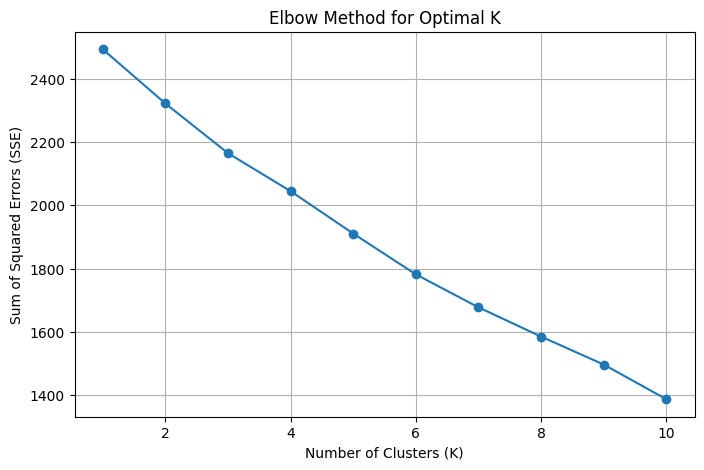

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# data_final.csv 파일 읽기
df = pd.read_csv('data_final.csv')

# '제품명' 제외
features = df.drop(['제품명'], axis=1)

# 표준 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# SSE를 저장할 리스트
sse = []

# 군집 개수(k) 설정 범위 (예: 1부터 10까지)
k_range = range(1, 11)

# 각 군집 개수에 대해 KMeans 모델 훈련 및 SSE 저장
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 메소드를 통한 최적 군집 개수 결정
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **

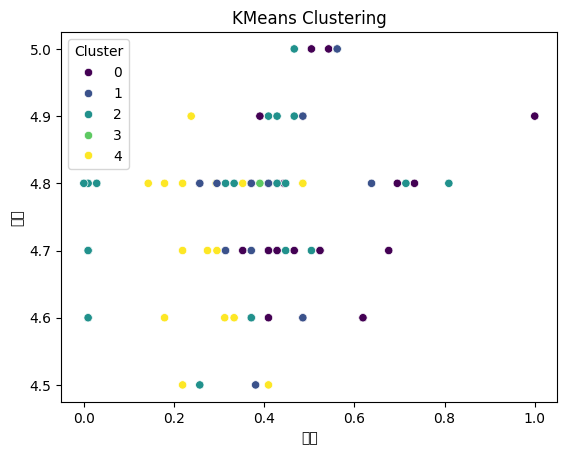

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# data_final.csv 파일 읽기
df = pd.read_csv('data_final.csv')

# '제품명' 컬럼은 군집화에 사용하지 않기 때문에 제외
features = df.drop(['제품명'], axis=1)

# 표준 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans 모델 훈련 (군집 개수: 6)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# 시각화
sns.scatterplot(x='원가', y='별점', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

# 결과를 CSV 파일로 저장
df.to_csv('clustered_result_5.csv', index=False)

In [45]:
# 클러스터별로 제품명을 보여주는 데이터프레임 생성
clustered_products = df.groupby('Cluster')['제품명'].apply(list).reset_index()
clustered_products.columns = ['Cluster', '제품명']

# 데이터프레임 출력
print(clustered_products)

# CSV 파일로 저장
clustered_products.to_csv('clustered_products_5.csv', index=False)

   Cluster                                                제품명
0        0  [아워 비건 어성초 시카 크림 100ml, [비건/잡티케어] 스킨푸드 유자씨 잡티 ...
1        1  [비건이펙트 클린 앤 글로우 청보리 LHA 젤 클렌저 205ml 기획 (+토너패드 ...
2        2  [[화해1위] 이즈앤트리 참마 비건 밀크 클렌저 220ml, [비건토너] 스킨푸드 ...
3        3  [비얼라우 무화과,부활초 비건 올인원 200g+30g 기획, 플리프 시카-알로에 카...
4        4  [[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml, [비건인증...


In [51]:
df = pd.read_csv("clustered_result_5.csv")

# 클러스터 0인 데이터만 추출
cluster_0_data = df[df['Cluster'] == 4]

# CSV 파일로 저장
cluster_0_data.to_csv('cluster_4_result.csv', index=False)

In [47]:
df = pd.read_csv("cluster_0_result.csv")
df.head()

,제품명,가벼움,가성비,각질,간편,건성,겨울,남성,대용량,모공,...,올인원,자극,지성,진정,트러블,피지,환절기,별점,원가,Cluster
0,아워 비건 어성초 시카 크림 100ml,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,4.6,0.485714,0
1,[비건/잡티케어] 스킨푸드 유자씨 잡티 맑음 세럼 50ml,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4.7,0.466667,0
2,보나쥬르 비건 그린티 워터크림 100ml,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.8,0.257143,0
3,클라뷰 리얼 비건 저분자 콜라겐 탄력 앰플 30ml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5.0,0.504762,0
4,클라뷰 리얼 비건 저분자 콜라겐 탄력 크림 50ml,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5.0,0.542857,0
